In [129]:

import tensorflow as tf
import cv2
import sys
import numpy as np
import time

In [130]:
tf.__version__ #tensorflow version

'2.5.0'

In [121]:

!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/aircrafts.jpg  

--2021-07-01 13:08:48--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/aircrafts.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-07-01 13:08:48 ERROR 404: Not Found.



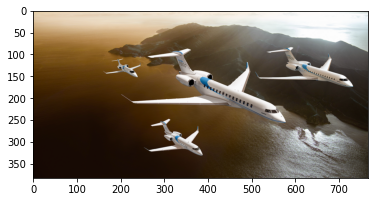

In [122]:
img = cv2.imread('aircrafts.jpg')
plt.imshow(img)

In [123]:
import matplotlib.pyplot as plt


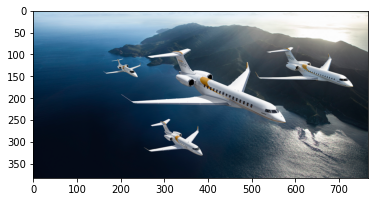

In [124]:
img_rgb= img[:,:,::-1]
plt.imshow(img_rgb)

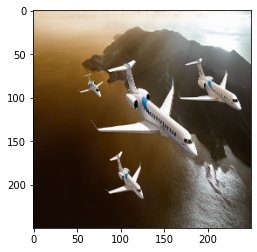

In [125]:

img_bgr = cv2.resize(img, (250,250))
plt.imshow(img_bgr)

# convert bgr to rgb
image_np = img_bgr[:,:,::-1]
image_np_expanded = np.expand_dims(image_np, axis=0)

In [126]:
tensor = tf.convert_to_tensor(image_np_expanded)

In [127]:

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
!tar xvzf centernet_hg104_512x512_coco17_tpu-8.tar.gz
!rm centernet_hg104_512x512_coco17_tpu-8.tar.gz

--2021-07-01 13:09:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.184.128, 2a00:1450:400c:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.184.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426100886 (1.3G) [application/x-tar]
Saving to: ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’

centernet_hg104_512 100%[===================>]   1.33G   126MB/s    in 11s     

2021-07-01 13:09:39 (121 MB/s) - ‘centernet_hg104_512x512_coco17_tpu-8.tar.gz’ saved [1426100886/1426100886]

centernet_hg104_512x512_coco17_tpu-8/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
centernet_hg104_512x512_coco17_tpu-8/checkpoint/checkpoint
centernet_hg104_512x512_coco17_tpu-8/checkpoint/ckpt-0.index
centernet_hg104_512x512_coco17_tpu-8/pip

In [128]:
!saved_model_cli show --dir ./centernet_hg104_512x512_coco17_tpu-8/saved_model/ --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_tensor'] tensor_info:
        dtype: DT_UINT8
        shape: (1, -1, -1, 3)
        name: serving_default_input_tensor:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['detection_boxes'] tensor_info:
        dtype: DT_FLOAT
        shape: (1, 100, 4)
        name: StatefulPartitionedCall:0
    outputs['detection_classes'] tensor_info:
        dtype: DT_FLOAT
        shape: (1, 100)
        name: StatefulPartitionedCall:1
    outputs['detection

In [131]:
saved_model_path='./centernet_hg104_512x512_coco17_tpu-8/saved_model/'
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(saved_model_path)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [134]:
output_dict = inference_func(tensor)

In [135]:
output_dict

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[6.44415319e-01, 3.31052542e-01, 8.68035614e-01, 5.07536292e-01],
         [2.15741783e-01, 6.71061933e-01, 4.62653846e-01, 9.58300650e-01],
         [2.28031933e-01, 3.45954418e-01, 4.53731894e-01, 5.34564435e-01],
         [2.89603561e-01, 2.10081160e-01, 4.02248889e-01, 3.23181987e-01],
         [3.69747251e-01, 4.72252011e-01, 6.70701981e-01, 7.55844951e-01],
         [2.27972046e-01, 3.36463928e-01, 2.96239018e-01, 4.72408831e-01],
         [4.97983396e-01, 2.61347592e-01, 5.76123416e-01, 5.87242126e-01],
         [2.27211729e-01, 3.31375688e-01, 3.59689176e-01, 4.76283640e-01],
         [3.03167403e-01, 2.61144519e-01, 6.73308492e-01, 7.50421405e-01],
         [6.47287011e-01, 3.36960882e-01, 8.71243358e-01, 5.09661674e-01],
         [2.32274130e-01, 3.02225381e-01, 3.53448272e-01, 4.56260532e-01],
         [6.46846235e-01, 3.50784361e-01, 6.90181434e-01, 4.12106693e-01],
         [2.86462605e-01, 2

In [136]:
output_dict['detection_classes']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5., 16.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  7.,  8.,  5.,  5.,  5.,
         1., 10.,  5.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,
         1.,  5.,  5.,  5.,  1.,  1.,  5.,  5.,  1.,  1.,  5.,  1.,  7.,
         5.,  5.,  1.,  1., 16.,  5.,  5.,  5.,  5.,  5.,  5.,  9.,  5.,
         1.,  5.,  1.,  1.,  5.,  5.,  7.,  5.,  5.]], dtype=float32)>

In [137]:
output_dict['detection_classes'].shape

TensorShape([1, 100])

In [138]:
output_dict['detection_classes'][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [139]:
output_dict['detection_classes'][0][99]

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [140]:

output_dict['detection_boxes'][0][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.6444153 , 0.33105254, 0.8680356 , 0.5075363 ], dtype=float32)>

In [141]:

output_dict['detection_boxes'][0][99]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.8367304 , 0.        , 0.9995385 , 0.05531349], dtype=float32)>

In [142]:

output_dict['detection_scores'].shape

TensorShape([1, 100])

In [143]:
output_dict['detection_scores'][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9287205>

In [144]:


output_dict['detection_scores'][0][99]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0060129478>

In [145]:
output_dict['num_detections']

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>

In [146]:
output_dict['num_detections'][0]

<tf.Tensor: shape=(), dtype=float32, numpy=100.0>

In [147]:

output_dict['num_detections'] = int(output_dict['num_detections'][0])
output_dict['detection_classes'] = output_dict['detection_classes'][0].numpy()
output_dict['detection_boxes'] = output_dict['detection_boxes'][0].numpy()
output_dict['detection_scores'] = output_dict['detection_scores'][0].numpy()

In [148]:


for i in range(output_dict['num_detections']):
    detection_score = output_dict['detection_scores'][i]

    if detection_score > 0.5:
        h, w, c = img.shape
        box = output_dict['detection_boxes'][i] * np.array([h, w,  h, w])
        box = box.astype(np.int)

        # Draw bounding box
        cv2.rectangle(img, \
            (box[1], box[0]), (box[3], box[2]), (255, 255, 255), 3)

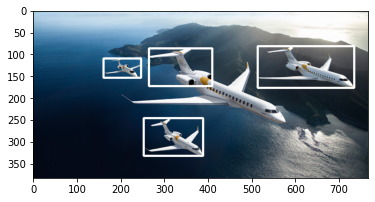

In [149]:
img_rgb = img[:,:,::-1]
plt.imshow(img_rgb)